## Detección de neumonía mediante CNN en imagenes de Pulmón

El objetivo de nuestro trabajo es conferir determinado aprendizaje a una máquina a través del aprendizaje profundo, mediante la estructura de redes neuronales convolucionales. Su objetivo es llevar a cabo la labor de clasificar imágenes de pulmón en dos categorías, si dicha imagen parece neumonía o no. 
Para ello Kaggle nos facilita un dataset con 5856 imágenes de pulmón, dividida de dos clases, imágenes de pulmón con neumonía y sin neumonía.

Nos enfrentamos a un tipo de problema de clasificación binaria. Esto determinará ciertas características de nuestro aprendizaje como la salida que tendrá nuestra red neuronal a definir y el tipo de parámetros que determinaremos en la monitorización del aprendizaje como la función de pérdida.

Nuestro dataset está formado por 5856 imagenes de pulmón. Nos encontramos con un dataset pequeño, cuyos datos se encuentran desbalanceadas. En primer lugar vamos a desarrollar un modelo de red neuronal que más se ajuste a nuestros objetivos y posteriormente realizaremos la implementación de diversas técnicas que mejoren nuestro entrenamiento, solventando asi los problemas de desbalanceo de datos y sobreajuste.

Dicho dataset se encuentra organizado en 3 carpetas:
- Train: Se encuentran imagenes que utilizaremos para el entrenamiento de la red.
- Validacion: Contiene un conjunto de imagenes que las utilizaremos para realizar la validación de la red. El objetivo de esta carpeta es conocer la evolución del entrenamiento por medio de una clasificación en imagenes que nunca ha visto.
- Test: Con este conjunto de imagenes evaluaremos la efectividad de la red ya entrenada.

## Organizando nuestro dataset

In [1]:
import os, shutil
os.getcwd()

'C:\\Users\\34629\\Desktop\\Notebook'

In [ ]:
directorio = './chest_xray'
os.listdir(directorio)

In [4]:
dir_test = directorio + '/test'
dir_train = directorio + '/train'
dir_val = directorio + '/val'

In [5]:
dir_test_nor = dir_test + '/NORMAL/'
dir_test_neu = dir_test + '/PNEUMONIA/'

dir_train_nor = dir_train + '/NORMAL/'
dir_train_neu = dir_train + '/PNEUMONIA/'

dir_val_nor = dir_val + '/NORMAL/'
dir_val_neu = dir_val + '/PNEUMONIA/'

A continuación vamos a observar el número total de imagenes que posee nuestro dataset y el balanceo de dichas imagenes en los dos grupos a clasificar

In [92]:
normal = len(os.listdir(dir_train_nor)) + len(os.listdir(dir_test_nor)) + len(os.listdir(dir_val_nor))
print("Número total de imagenes de pulmón SIN neumonia:", normal)

neumonia = len(os.listdir(dir_train_neu)) + len(os.listdir(dir_test_neu)) + len(os.listdir(dir_val_neu))
print("Número total de imagenes de pulmón CON neumonia:", neumonia)

print("Número total de imagenes en el dataset:", normal+ neumonia)


Número total de imagenes de pulmón SIN neumonia: 1583
Número total de imagenes de pulmón CON neumonia: 4273
Número total de imagenes en el dataset: 5856


Tenemos 5856 imágenes de pulmón, de las cuales:
- Sin neumonia: 1583 corresponde al 27% del total
- Con neumonia: 4273 corresponde al 73% del total 

Vamos a ver el porcentaje de imagenes que se encuentra en cada capeta y si es muy desajustado lo ajustaremos con un porcentaje de 60% 20% 20% para las carpetas de train, validación y test


In [93]:
print('nº imagenes entrenamiento normal:', len(os.listdir(dir_train_nor)))
print('nº imagenes entrenamiento neumonia', len(os.listdir(dir_train_neu)))

print('nº imagenes test normal', len(os.listdir(dir_test_nor)))
print('nº imagenes test neumonia', len(os.listdir(dir_test_neu)))

print('nº imagenes validación normal', len(os.listdir(dir_val_nor)))
print('nº imagenes validacion neumonia', len(os.listdir(dir_val_neu)))

nº imagenes entrenamiento normal: 1341
nº imagenes entrenamiento neumonia 3875
nº imagenes test normal 234
nº imagenes test neumonia 390
nº imagenes validación normal 8
nº imagenes validacion neumonia 8


Como podemos ver el el reparto de imagenes en las siguientes carpetas se encuentra muy desajustado, es por ello que las vamos a organizar en función del porcentaje 60%, 20%, 20% en los siguientes nuevos directorios. De esta forma quedarian:
- Train: 60%
    - Normal: 949
    - Neumonia: 2563
- Test: 20%
    - Normal: 317
    - Neumonia: 855
- Validacion: 20%
    - Normal: 317
    - Neumonia: 855
    

In [2]:
new_dir = './Dataset_Organizado'

In [3]:
new_train = new_dir + '/train'
new_test = new_dir + '/test'
new_val = new_dir + '/validacion'

In [4]:
new_train_nor = new_train + '/Normal/'
new_train_neu = new_train + '/Neumonia/'

new_test_nor = new_test + '/Normal/'
new_test_neu = new_test + '/Neumonia/'

new_val_nor = new_val + '/Normal/'
new_val_neu = new_val + '/Neumonia/'

In [74]:
#pasamos 949 imagenes normales de la carpeta de entrenamiento normal original a carpeta nueva de entrenamiento normal
l_train_nor = os.listdir(dir_train_nor)

for i in range(949):
    nombre = l_train_nor[i]
    dir_now = os.path.join(dir_train_nor, nombre)
    dir_new = os.path.join(new_train_nor, nombre)
    shutil.copyfile(dir_now, dir_new)

In [9]:
print('nº imagenes normal entrenamiento:', len(os.listdir(new_train_nor)))

nº imagenes normal entrenamiento: 949


In [80]:
#pasamos 317 imagenes normales de la carpeta de entrenamiento normal original a carpeta nueva de test normal

l_train_nor = os.listdir(dir_train_nor)

for i in range(950, 1267):
    nombre = l_train_nor[i]
    dir_now = os.path.join(dir_train_nor, nombre)
    dir_new = os.path.join(new_test_nor, nombre)
    shutil.copyfile(dir_now, dir_new)

In [10]:
print('nº imagenes normal test:', len(os.listdir(new_test_nor)))

nº imagenes normal test: 317


In [84]:
#pasamos las 75 imagenes restantes de la carpeta de entrenamiento normal original a la nueva carpeta validacion normal
l_train_nor = os.listdir(dir_train_nor)

for i in range(1267, 1341):
    nombre = l_train_nor[i]
    dir_now = os.path.join(dir_train_nor, nombre)
    dir_new = os.path.join(new_val_nor, nombre)
    shutil.copyfile(dir_now, dir_new)
    
#pasamos 234 imagenes de la carpeta de test normal original a la nueva carpeta validacion normal

l_test_nor = os.listdir(dir_test_nor)

for i in range(234):
    nombre = l_test_nor[i]
    dir_now = os.path.join(dir_test_nor, nombre)
    dir_new = os.path.join(new_val_nor, nombre)
    shutil.copyfile(dir_now, dir_new)

#pasamos 8 imagenes de la carpeta de validacion normal original a la nueva carpeta validacion normal

l_val_nor = os.listdir(dir_val_nor)

for i in range(8):
    nombre = l_val_nor[i]
    dir_now = os.path.join(dir_val_nor, nombre)
    dir_new = os.path.join(new_val_nor, nombre)
    shutil.copyfile(dir_now, dir_new)

In [11]:
print('nº total imagenes normales validacion:', len(os.listdir(new_val_nor)))

nº total imagenes normales validacion: 316


In [88]:
#pasamos 2563 imagenes de la carpeta orginal train neumonia a la nueva carpeta train neumonia

l_train_neu = os.listdir(dir_train_neu)

for i in range(2563):
    nombre = l_train_neu[i]
    dir_now = os.path.join(dir_train_neu, nombre)
    dir_new = os.path.join(new_train_neu, nombre)
    shutil.copyfile(dir_now, dir_new)

In [12]:
print('nº total imagenes con neumonia train:', len(os.listdir(new_train_neu)))

nº total imagenes con neumonia train: 2563


In [91]:
#pasamos 855 imagenes de la carpeta orginal train neumonia a la nueva carpeta test neumonia

l_train_neu = os.listdir(dir_train_neu)

for i in range(2564, 3419):
    nombre = l_train_neu[i]
    dir_now = os.path.join(dir_train_neu, nombre)
    dir_new = os.path.join(new_test_neu, nombre)
    shutil.copyfile(dir_now, dir_new)

In [13]:
print('nº total imagenes con neumonia test:', len(os.listdir(new_test_neu)))

nº total imagenes con neumonia test: 855


In [96]:
#pasamos las 457 imagenes restantes de la carpeta orginal train neumonia a la nueva carpeta validacion neumonia

l_train_neu = os.listdir(dir_train_neu)

for i in range(3419, 3875):
    nombre = l_train_neu[i]
    dir_now = os.path.join(dir_train_neu, nombre)
    dir_new = os.path.join(new_val_neu, nombre)
    shutil.copyfile(dir_now, dir_new)

#paso 390 imagenes de test neumonia a nuevo validacion neumonia
l_test_neu = os.listdir(dir_test_neu)

for i in range(390):
    nombre = l_test_neu[i]
    dir_now = os.path.join(dir_test_neu, nombre)
    dir_new = os.path.join(new_val_neu, nombre)
    shutil.copyfile(dir_now, dir_new)
    
#paso 8 imagenes de val neumonia a nuevo validacion nuemonia

l_val_neu = os.listdir(dir_val_neu)

for i in range(len(l_val_neu)):
    nombre = l_val_neu[i]
    dir_now = os.path.join(dir_val_neu, nombre)
    dir_new = os.path.join(new_val_neu, nombre)
    shutil.copyfile(dir_now, dir_new)

In [5]:
print('nº total imagenes con neumonia validacion:', len(os.listdir(new_val_neu)))

nº total imagenes con neumonia validacion: 854


Nuestro modelo deberá presentar una precisión superior al porcentaje de datos de la clase mayoritaria para demostrar su correcto funcionamiento.

## Preprocesamiento de los datos

Nuestro dataset se encuentra formado con un conjunto de imagenes en formato JPGE, es por ello que debemos formatear los datos para ser convertidos en tensores de punto flotante para alimentar la red. Para ello debemos realizar lo siguiente:
- Leer los ficheros de imagenes
- Decodificar JPGE en una matriz
- Convertir la matriz en tensores de punto flotante
- Re-escalar los valores


**Estudio de nuestro dataset**

Para realizar un correcto preprocesamiento de datos debemos conocer diferentes aspectos como, las dimesiones de nuestra imagenes, el número de canales que posee y finalmente el tipo de datos (unit8, int8 ..etc) para re-escalarlos posteriomente


In [5]:
from skimage.io import imread
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
import cv2
import random
import imageio 
from PIL import Image
import matplotlib.pyplot as plt 



Using TensorFlow backend.


./Dataset_Organizado/train/Neumonia/person1282_bacteria_3245.jpeg


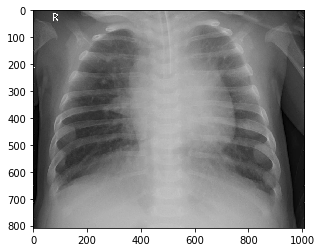

In [6]:
imagenes_train_neu = [os.path.join(new_train_neu, fname) for fname in os.listdir(new_train_neu)]
x = random.randint(1, len(imagenes_train_neu))
imagen_neumonia = imagenes_train_neu[x]
print(imagen_neumonia)

img_neu = cv2.imread(imagen_neumonia)
plt.imshow(img_neu, cmap='gray')

./Dataset_Organizado/train/Normal/IM-0323-0001.jpeg


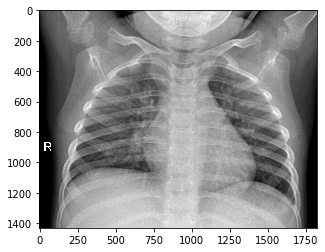

In [7]:
imagenes_train_nor = [os.path.join(new_train_nor, fname) for fname in os.listdir(new_train_nor)]
x = random.randint(1, len(imagenes_train_nor))
imagen_normal = imagenes_train_nor[x]
print(imagen_normal)

img_nor = cv2.imread(imagen_normal)
plt.imshow(img_nor, cmap='gray')


In [8]:
#formato
print("La imagen img_neu es de tipo:", type(img_neu))
print("La imagen img_nor es de tipo:",type(img_nor))

#Dimension 
print("La imagen img_neu tiene una dimensión:", img_neu.shape) 
print("La imagen img_nor tiene una dimensión:", img_nor.shape) 

#tipo de datos que hay que redimensionar
print("El tipo de dato de la imagen img_neu es", img_neu.dtype)
print("El tipo de dato de la imagen img_nor es", img_nor.dtype)


La imagen img_neu es de tipo: <class 'numpy.ndarray'>
La imagen img_nor es de tipo: <class 'numpy.ndarray'>
La imagen img_neu tiene una dimensión: (808, 1008, 3)
La imagen img_nor tiene una dimensión: (1430, 1824, 3)
El tipo de dato de la imagen img_neu es uint8
El tipo de dato de la imagen img_nor es uint8


Ya conocemos las dimensiones, canales y tipo de datos que presenta nuestro dataset. Las caracteristicas con las que nos encontramos son las siguientes. Estos posee 3 canales, la dimension de las imagenes varian en función de la imagen y finalmente el tipo de dato es unit8, este se encuentra en el rango de valores [0, 255], por lo tanto re-escalaremos los valores /255.

Keras nos proporciona la función **ImagenDataGenerator**, que automáticamente convierte ficheros de imágenes en tensores preprocesados. 



In [15]:
#SIN Aumento de datos, reescalar en punto flotante y normalización
train_datagen = ImageDataGenerator(rescale = 1./255)

#Reescalar en punto flotante y normalización
test_datagen = ImageDataGenerator(rescale=1./255)

ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32

train_generator = train_datagen.flow_from_directory(
        #Directorio
        new_train,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        # Etiquetas binarias
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        #Directorio
        new_val,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        #Etiquetas binarias
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    #Directorio
    new_test,
    #Redimension de las imágenes a 64x64
    target_size = (64, 64),
    #Número de imágenes por lote de datos
    batch_size = batch,
    #Etiquetas binarias
    class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


Este proceso ha generado un paquete de imágenes de tamaño (32, 64, 64, 3) (32 imágenes de 64x64 con 3 canales) y un paquete de etiquetas binarias de tamaño (32)

## Modelo 1

**Construyendo - modelo 1**

In [9]:
#importamos librerias

import numpy as np 
import matplotlib.pyplot as plt 

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.vis_utils import plot_model



Nuestra red convolucional esta formada por **2 capas de convolución**, esto es producto del estudio de un **kerne de 3x3 y una función de activación Relu** generando 32 filtros, es decir **32 matrices que constituyen las capas ocultas de la red, cada una de 64x64x3**, respectivamente por cada convolución. 


Posteriormente a cada convolución le aplicamos un proceso de pooling, es decir una capa de reducción, en nuestro caso haremos uso de **MaxPooling de 2x2, reduciremos el número de neuronas de la capa oculta a la mitad** tras cada convolución, quedandonos con las caracteristicas mas importante que detecto cada flitro de Max-Pooling .


Aplanamos mediante la función **Flatten** la salida del MaxPooling de nuestra ultima convolución. La salida de la capa a aplanar es una salida tridimensional, como vamos a conectar nuestro nuestras capas convolucionales a unas capas de redes neuronales tradicionales, es por ello que tenemos que aplanarla para que trabajen en una única dimensión. Estas quedan **densamente conectadas a una nueva capa oculta tradicional formada por 128 neuronas** a la que le aplicamos nuevamente la **función de activación Relu**.

Finalmente **conectamos densamente a la salida de nuestra red** (1 neurona), utilizando la **función de activación Sigmoid**, la cual nos devuelve una probabilidad de salida.

In [18]:
#Modelo secuencial
modelo1 = Sequential()
#Primera convolución
modelo1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
#Capa de pooling
modelo1.add(MaxPooling2D(pool_size = (2, 2)))
#Segunda convolucion
modelo1.add(Conv2D(32, (3, 3), activation="relu"))
#Capa de pooling
modelo1.add(MaxPooling2D(pool_size = (2, 2)))
#Aplanamos
modelo1.add(Flatten())
# Conectamos densamente
modelo1.add(Dense(activation = 'relu', units = 128))
#Salida 
modelo1.add(Dense(activation = 'sigmoid', units = 1))

Podemos ver visualmente las entradas y salidas a cada capa de nuestra red

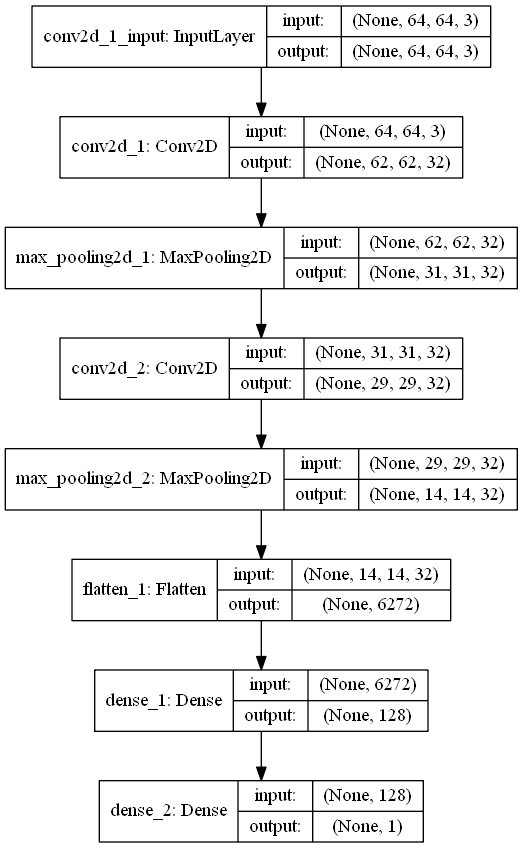

In [19]:
plot_model(modelo1, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [20]:
modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

**Configuración del proceso de aprendizaje**

Mediante el método **compile** definiremos los parámetros que intervienen en el **proceso de aprendizaje de la red**.
Los parámetros a definir son los siguientes:
- **Función de perdida**, la cual nos indicará lo cercana que esta la red de su optimo global, es decir, de su etiqueta correcta facilitada a la red. En función del tipo de problema en el que nos encontremos determinamos una funciónd de perdida u otra. Como nos encontramos en un problema de **clasificación binaria** escogemos la función de perdida **binary_crossentropy**
- **Un optimizador**, definiremos un tipo de mecanismo mediante el cual la red se actualiza asi misma (los pesos y sesgos). A pesar de ser el optimizador **rmsprop** el más usado, en nuestro caso escogemos el optimizador **Adam** ya que es con el que hemos obtenido mejores resutados optimizando la eficiencia de nuestro modelo.
- **Metrica**. Para juzgar el rendimiento de nuestro modelo hacemos uso de la métrica **Accuracy**, esta nos proporciona el número de aciertos que ha tenido la red

In [21]:
modelo1.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy'])

**Entrenamos el modelo**

In [22]:
ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32

modeloF1 = modelo1.fit_generator(
    train_generator,
    steps_per_epoch = ejemplos_train // batch,
    epochs =50,
    validation_data = validation_generator,
    validation_steps = ejemplos_validacion // batch )

Epoch 1/50
109/109 [==============================] - 73s 673ms/step - loss: 0.3298 - accuracy: 0.8503 - val_loss: 0.6436 - val_accuracy: 0.8550
Epoch 2/50
109/109 [==============================] - 51s 467ms/step - loss: 0.1227 - accuracy: 0.9509 - val_loss: 0.3136 - val_accuracy: 0.8409
Epoch 3/50
109/109 [==============================] - 51s 468ms/step - loss: 0.0879 - accuracy: 0.9649 - val_loss: 1.1259 - val_accuracy: 0.8401
Epoch 4/50
109/109 [==============================] - 51s 467ms/step - loss: 0.0862 - accuracy: 0.9670 - val_loss: 0.9508 - val_accuracy: 0.8682
Epoch 5/50
109/109 [==============================] - 51s 472ms/step - loss: 0.0743 - accuracy: 0.9727 - val_loss: 0.7499 - val_accuracy: 0.8392
Epoch 6/50
109/109 [==============================] - 59s 541ms/step - loss: 0.0673 - accuracy: 0.9716 - val_loss: 0.8032 - val_accuracy: 0.8436
Epoch 7/50
109/109 [==============================] - 58s 532ms/step - loss: 0.0548 - accuracy: 0.9790 - val_loss: 0.7550 - val_ac

In [23]:
modelo1.save('modeloF1.h5')

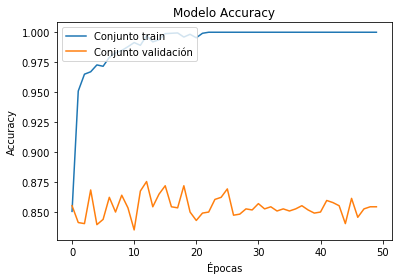

In [24]:
plt.plot(modeloF1.history['accuracy'])
plt.plot(modeloF1.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Conjunto train', 'Conjunto validación'], loc='upper left')
plt.show()

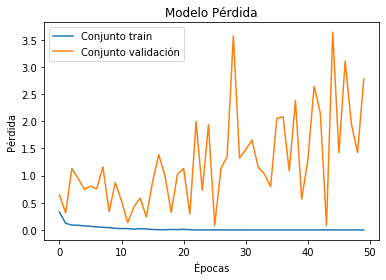

In [25]:
plt.plot(modeloF1.history['loss'])
plt.plot(modeloF1.history['val_loss'])
plt.title('Modelo Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Conjunto train', 'Conjunto validación'], loc='upper left')
plt.show()

Las gráficas anteriores nos muestran la evolución del entrenamiento en función de los valores de pérdida y precisión sobre el conjunto de datos de entrenamiento y validación. 

Estas gráficas como podemos observar presentan característica de un modelo sobreajustado. Esto se puede apreciar con gran claridad en la gráfica que representa la precisión de la red sobre los datos de entrenamiento y validación. En dicha gráfica se puede observar como la precisión sobre el conjunto de entrenamiento se va afinando cada vez más aproximándose al 100%.
La precisión del conjunto de datos de validación comienza creciendo, presentando unas oscilaciones más estables a partir de la época 10 hasta la 20, donde su precisión se mantiene entre un 84-86%, sin embargo, a partir de la época 20 esta precisión comienza a degradarse.

Esta apreciación se puede observar también en la gráfica de pérdida. En ella la evolución de los valores de pérdida con el conjunto de datos de entrenamiento va decreciendo de forma continua aproximándose a valores cercanos al 0, sin embargo, el valor de pérdida del conjunto de validación comienza decreciendo hasta que a partir de la época 20 empieza a dispararse.


**Evaluación modelo 1**

In [26]:
test_accu1 = modelo1.evaluate_generator(test_generator)

In [27]:
test_accu1

[6.519802354887361e-06, 0.9752559661865234]

El modelo desarrollado presenta una evaluación del conjunto de datos de test del 97%, sin embargo no debemos dejar de tener en mente que estamos tratando con un conjunto de datos desbalanceados y que como hemos visto en la evolución del entrrenamiento la red se encuentra sobreajustada, por ello vamos a hacer uso de diferentes técnicas para solventar el problema del desbalanceo de datos y el sobreajuste. 

## Modelo 2 - Uso Aumento de datos

En el siguiente modelo vamos a hacer uso de la misma configuración de parámetros e hiperparámetros establecidos en el modelo 1 pero vamos a utilizar en este caso la técnica para solventar el problema del desbalanceo de datos. Con el uso de esta técnica pretendemos mejorar el entrenamiento de nuestra red, disminuyendo el desbalanceo y el sobreajuste como causa de esto.

**Aumento de datos**

Como habíamos comentado con anterioridad, nuestros datos se encuentran desbalanceados, esto es un gran problema a la hora de entrenar una red, perjudicando la clasificación de la clase minoritaria. Para solventar este problema hacemos uso del aumento de datos facilitado por keras a través de la clase ImagenDataGenerator. Su objetivo es aumentar el tamaño del conjunto de datos de entrenamiento, mediante la creación de versiones modificadas de imágenes en el conjunto de entrenamiento.
Las transformaciones realizadas son:
- Ángulo de corte en sentido antihorario.
- Zoom aleatorio
- Volteo aleatorio de las entradas horizontalmente
Se podrían haber aplicado muchas otras más transformaciones a una imagen pero no eran útiles en nuestro caso


In [37]:
#Aumento de datos, reescalar en punto flotante y normalización
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Reescalar en punto flotante y normalización
test_datagen = ImageDataGenerator(rescale=1./255)

ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32
train_generator = train_datagen.flow_from_directory(
        #Directorio
        new_train,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        # Etiquetas binarias
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        #Directorio
        new_val,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        #Etiquetas binarias
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    #Directorio
    new_test,
    #Redimension de las imágenes a 64x64
    target_size = (64, 64),
    #Número de imágenes por lote de datos
    batch_size = batch,
    #Etiquetas binarias
    class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [38]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


Este proceso ha generado un paquete de imágenes de tamaño (32, 64, 64, 3) (32 imágenes de 64x64 con 3 canales) y un paquete de etiquetas binarias de tamaño (32)

**Construyendo modelo 2**

In [39]:
#Modelo secuencial
modelo2 = Sequential()
#Primera convolución
modelo2.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
#Capa de pooling
modelo2.add(MaxPooling2D(pool_size = (2, 2)))
#Segunda convolucion
modelo2.add(Conv2D(32, (3, 3), activation="relu"))
#Capa de pooling
modelo2.add(MaxPooling2D(pool_size = (2, 2)))
#Aplanamos
modelo2.add(Flatten())
# Conectamos densamente
modelo2.add(Dense(activation = 'relu', units = 128))
#Salida 
modelo2.add(Dense(activation = 'sigmoid', units = 1))

Podemos ver visualmente las entradas y salidas a cada capa de nuestra red

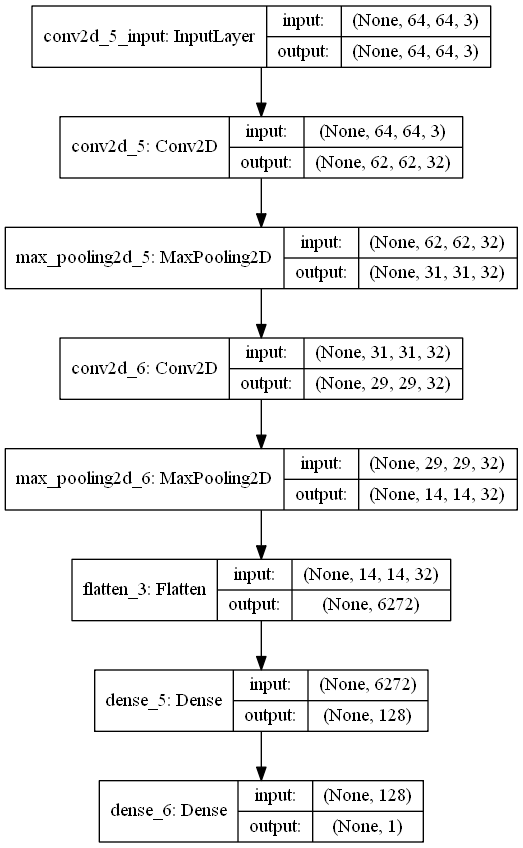

In [40]:
plot_model(modelo2, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [41]:
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

**Configuración del proceso de aprendizaje**

In [42]:
modelo2.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy'])

**Entrenamos el modelo**

In [43]:
ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32

modeloF2 = modelo2.fit_generator(
    train_generator,
    steps_per_epoch = ejemplos_train // batch,
    epochs =50,
    validation_data = validation_generator,
    validation_steps = ejemplos_validacion // batch )

Epoch 1/50
109/109 [==============================] - 52s 475ms/step - loss: 0.4058 - accuracy: 0.8213 - val_loss: 0.4607 - val_accuracy: 0.8151
Epoch 2/50
109/109 [==============================] - 52s 476ms/step - loss: 0.2715 - accuracy: 0.8876 - val_loss: 0.3859 - val_accuracy: 0.8743
Epoch 3/50
109/109 [==============================] - 54s 492ms/step - loss: 0.2146 - accuracy: 0.9121 - val_loss: 0.2564 - val_accuracy: 0.8752
Epoch 4/50
109/109 [==============================] - 52s 476ms/step - loss: 0.1932 - accuracy: 0.9204 - val_loss: 0.4542 - val_accuracy: 0.8708
Epoch 5/50
109/109 [==============================] - 53s 485ms/step - loss: 0.1771 - accuracy: 0.9305 - val_loss: 0.1891 - val_accuracy: 0.8946
Epoch 6/50
109/109 [==============================] - 60s 549ms/step - loss: 0.1622 - accuracy: 0.9359 - val_loss: 0.2574 - val_accuracy: 0.8919
Epoch 7/50
109/109 [==============================] - 53s 482ms/step - loss: 0.1621 - accuracy: 0.9376 - val_loss: 0.3240 - val_ac

In [44]:
modelo2.save('modeloF2.h5')

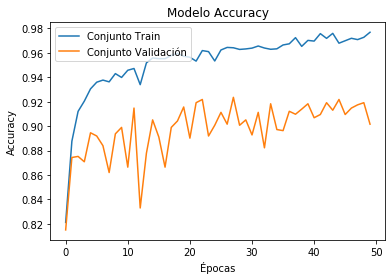

In [45]:
plt.plot(modeloF2.history['accuracy'])
plt.plot(modeloF2.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Conjunto Train', 'Conjunto Validación'], loc='upper left')
plt.show()


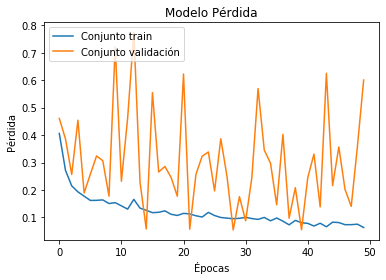

In [46]:
plt.plot(modeloF2.history['loss'])
plt.plot(modeloF2.history['val_loss'])
plt.title('Modelo Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Conjunto train', 'Conjunto validación'], loc='upper left')
plt.show()

Como podemos observar nuestro modelo de entrenamiento ha mejorado considerablemente al aplicarle la técnica del Aumento de dato. Esta técnica solventa el problema del desbalanceo de datos que a su vez ayuda a eliminar el sobreajuste de la red.

La gráfica de precisión presenta una evolución de la precisión sobre el conjunto de entrenamiento crece de forma continua aproximándose a valores cercanos al 100%, al igual que la evolución de la precisión sobre el conjunto de datos de validación, sin embargo, esta presenta una evolución rápida y creciente hasta la época 20 donde a partir de entonces el crecimiento disminuye sin llegar a degradarse. Mantiene una precisión sobre los datos de validación de un 89-91%.

Por otra parte, en la gráfica de la evolución del valor de pérdida durante el entrenamiento. La evolución del valor de pérdida sobre el conjunto de datos de entrenamiento disminuye de forma continua aproximándose al 0, sin embargo, la evolución de la pérdida en el conjunto de datos de validación presenta unos rangos muy dispares al principio los cuales poco a poco conforme evoluciona van disminuyendo hasta la época 20, a partir de entonces se mantiene en un rango estable entre el 0.2-0.5.

Como hemos dicho, nuestro modelo ha mejorado considerablemente, pero sigue presentando características de modelo sobreajustado.



**Evaluacion del modelo**

In [47]:
test_accu2 = modelo2.evaluate_generator(test_generator)

In [49]:
test_accu2

[0.2219621241092682, 0.9215016961097717]

El modelo desarrollado presenta una evaluación del conjunto de datos de test del 92%, un porcentaje menor que el modelo anterior, aun presentando mejor evolución a lo largo del entrenamietno. Aunque el modelo haya mejorado considerablemente con respecto al modelo 1, sigue presentando sobreajuste. Vamos a aplicar a continuación una técnica de regularización para mejorar el modelo eliminando el sobreajuste.

## Modelo 3 - Uso de Dropout

Debido a los buenos resultados obtenidos en el modelo anterior debido a la aplicación de la técnica del Aumento de datos, vamos a reproducir en este modelo el modelo anterior con los mismos parámetros e hiperparámetros y la técnica del Aumento de datos y vamos a añadir una técnica para disminuir el sobreajuste, esta técnica es llamada **Dropout**.

**Aumento de datos**

In [10]:
#Aumento de datos, reescalar en punto flotante y normalización
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Reescalar en punto flotante y normalización
test_datagen = ImageDataGenerator(rescale=1./255)

ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32
train_generator = train_datagen.flow_from_directory(
        #Directorio
        new_train,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        # Etiquetas binarias
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        #Directorio
        new_val,
        #Redimension de las imágenes a 64x64
        target_size=(64, 64),
        #Número de imágenes por lote de datos
        batch_size=batch,
        #Etiquetas binarias
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    #Directorio
    new_test,
    #Redimension de las imágenes a 64x64
    target_size = (64, 64),
    #Número de imágenes por lote de datos
    batch_size = batch,
    #Etiquetas binarias
    class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


**Construyendo el modelo 3 - Dropout**

La técnica de **Dropout**  es una de las técnicas de regularización de las redes neuronales. Esta consiste en poner de forma aleatoria a 0 un conjunto de valores de la salida de la capa de la red neuronal durante el entrenamiento. Al poner a 0 un conjunto de valores introducimos ruido, esto permite que los patrones no significativos, aquellos que la red aprende ajustando en exceso, se rompan, solventando así el problema de sobreajuste.

En este caso aplicaremos Dropout para el 50% de los valores de salida.

In [12]:
#Modelo secuencial
modelo3 = Sequential()
#Primera convolución
modelo3.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
#Capa de pooling
modelo3.add(MaxPooling2D(pool_size = (2, 2)))
#Segunda convolucion
modelo3.add(Conv2D(32, (3, 3), activation="relu"))
#Capa de pooling
modelo3.add(MaxPooling2D(pool_size = (2, 2)))
#Aplanamos
modelo3.add(Flatten())
# Conectamos densamente
modelo3.add(Dense(activation = 'relu', units = 128))
#Técnica dropout
modelo3.add(Dropout(0.5))
#Salida 
modelo3.add(Dense(activation = 'sigmoid', units = 1))

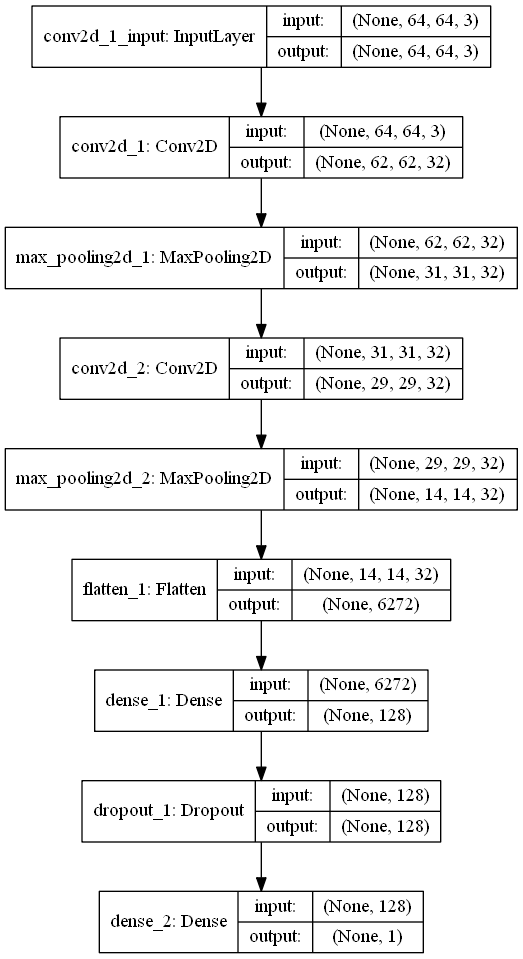

In [13]:
plot_model(modelo3, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [14]:
modelo3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [15]:
modelo3.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy'])

In [16]:
ejemplos_train = 3512
ejemplos_validacion = 1170
batch = 32

modeloF3 = modelo3.fit_generator(
    train_generator,
    steps_per_epoch = ejemplos_train // batch,
    epochs =50,
    validation_data = validation_generator,
    validation_steps = ejemplos_validacion // batch )

Epoch 1/50
109/109 [==============================] - 79s 721ms/step - loss: 0.4497 - accuracy: 0.7922 - val_loss: 0.2916 - val_accuracy: 0.8672
Epoch 2/50
109/109 [==============================] - 56s 511ms/step - loss: 0.2833 - accuracy: 0.8805 - val_loss: 0.2363 - val_accuracy: 0.8102
Epoch 3/50
109/109 [==============================] - 55s 502ms/step - loss: 0.2653 - accuracy: 0.8911 - val_loss: 0.4277 - val_accuracy: 0.8568
Epoch 4/50
109/109 [==============================] - 58s 536ms/step - loss: 0.2436 - accuracy: 0.8989 - val_loss: 0.3146 - val_accuracy: 0.8735
Epoch 5/50
109/109 [==============================] - 61s 558ms/step - loss: 0.2208 - accuracy: 0.9089 - val_loss: 0.1945 - val_accuracy: 0.8902
Epoch 6/50
109/109 [==============================] - 59s 538ms/step - loss: 0.2055 - accuracy: 0.9216 - val_loss: 0.2620 - val_accuracy: 0.8875
Epoch 7/50
109/109 [==============================] - 57s 525ms/step - loss: 0.1782 - accuracy: 0.9305 - val_loss: 0.5406 - val_ac

In [17]:
modelo3.save('modeloF3.h5')

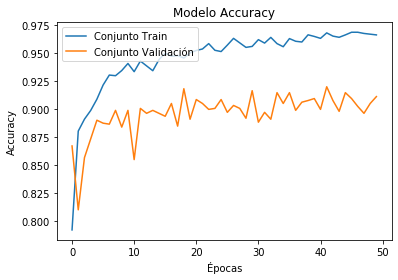

In [18]:
plt.plot(modeloF3.history['accuracy'])
plt.plot(modeloF3.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Conjunto Train', 'Conjunto Validación'], loc='upper left')
plt.show()

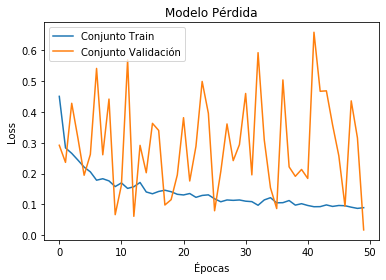

In [19]:
plt.plot(modeloF3.history['loss'])
plt.plot(modeloF3.history['val_loss'])
plt.title('Modelo Pérdida')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.legend(['Conjunto Train', 'Conjunto Validación'], loc='upper left')
plt.show()

Finalmente, el modelo 3 en el cual se han usado técnicas de aumento de datos y regularización como a técnica dropout, presenta una evolución de precisión y perdida a lo largo del entrenamiento poco homogéneo. Aunque estas técnicas hayan mejorado considerablemente el modelo, las gráficas nos muestran características de un modelo sobreajustado, debido a la dispersión de valores que presenta la precisión y la perdida sobre los datos de validación con respecto a los datos de entrenamiento. 

Como se pueden observar, en la gráfica que nos muestra la evolución de la precisión del modelo durante el entrenamiento, se puede observar como la precisión de entrenamiento crece de forma continua, linealmente con el tiempo hasta alcanzar valores cercanos al 100%, sin embargo, el crecimiento progresivo de la precisión de validación se detiene entre el 89-91%. 
Por otra parte, la pérdida de validación alcanza el mínimo al igual que antes aproximadamente posterior a décima época, mientras que la de entrenamiento continúa cayendo, la pérdida de validación comienza a oscilar entre un margen de error de 0.05-0.5.


## Evaluación del modelo


In [20]:
test_accu3 = modelo3.evaluate_generator(test_generator)

In [53]:
test_accu3

[0.12408211827278137, 0.9626736044883728]

Como podemos observar la métrica de la evaluación del modelo es de un 96%, esto es una métrica muy buena, pero no debemos olvidar que estamos trabajando con un dataset que se encuentra desbalanceado y que las gráficas representadas con anterioridad presentaban características de modelos sobreajustados, por lo que es conveniente aplicar otras métricas con las que podamos observar la ejecución del modelo

## Medidas de rendimiento


Cuando trabajamos con un problema donde los datos se encuentran desbalanceados, como es en nuestro caso, no basta evaluar dicha red mediante la medida de rendimiento Accuracy, ya que esta nos muestra el numero de aciertos que ha tenido la red, pudiendo llegar a un accuracy del 70% y estar la red mal entrenada. Esto es debido a que si el dataset presenta desbalanceo puede estar formado por un conjunto de datos donde el 70% de estos corresponda a una clase y el 30% a la segunda clase. Por lo tanto la red clasificaria correctamente a la primera clase y no a la segunda, estando por lo tanto mal entrenada. 

Como nuestros datos se encuentra en situaciónde desbalanceo, vamos a obtener la matriz de confusión, esta nos permitira la visualización de las predicciones dadas por la red:
- Verdaderos positivos
- Falsos positivos
- Verdaderos negativos
- Falsos negativos

Para ello guardaremos los valores predichos por la red dado el conjunto de test (preds) y las etiquetas correspondiente al conjunto de test (test_labels). Generamos la matriz de confusión dando como datos de entrada preds_val y orig_labels

In [21]:
test_generator = test_datagen.flow_from_directory(
    new_test,
    target_size = (64, 64),
    batch_size = 1170)

Found 1172 images belonging to 2 classes.


In [22]:
for test_data, test_labels in test_generator:
    print('test_data shape:', test_data.shape)
    print('labels batch shape:', test_labels.shape)
    break

test_data shape: (1170, 64, 64, 3)
labels batch shape: (1170, 2)


In [23]:
#etiquetas correcta a los valores de entrada que predice mi red
test_labels[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Para obtener los valores predichos de la red neuronal ya entrenada a través de nuestro conjunto de datos test, hacemos uso de la función **predict()**. Estas predicciones las almacenaremos en la variable preds. 

In [24]:
preds = modelo3.predict(test_data)

In [25]:
preds[:10]

array([[9.8278189e-01],
       [9.9925148e-01],
       [3.9488077e-05],
       [1.4677405e-02],
       [7.3599225e-01],
       [3.8387617e-01],
       [9.9483848e-01],
       [1.1473894e-05],
       [4.7454238e-04],
       [5.1635504e-04]], dtype=float32)

Por otra parte, almacenamos las etiquetas correspondientes al conjunto de test test_labels.  Posteriormente obtenemos los índices de los valores máximos a lo largo del eje indicado mediante el método **argmax()** quedando estos almacenados en preds_val y orig_labels. 

In [26]:
preds_val = np.argmax(preds, axis = 1)
orig_labels = np.argmax(test_labels, axis=1)

In [27]:
print(preds_val.shape)
print(orig_labels.shape)

(1170,)
(1170,)


Importamos las librerias necesarias

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt 
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn import svm, datasets

import numpy as np 


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Finalmente mediante el uso de la función **confusion_matriz**  a la cual le damos como parámetros de entrada preds_val y orig_labels generamos una matriz de confusión, en ella se comparan los resultados predichos por la red y los reales, posteriormente lo representamos.

In [30]:
matriz_de_confusion = confusion_matrix(orig_labels, preds_val)

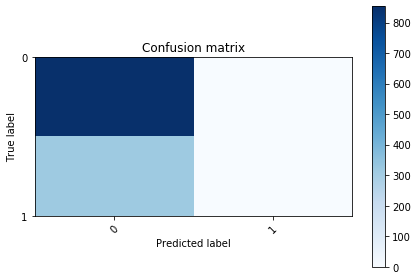

In [31]:
plot_confusion_matrix(matriz_de_confusion, classes = range(2))

En la matriz de confusión podemos corroborar lo mencionado anteriormente que no sabíamos con total certeza. Nuestra modelo de red neuronal convolucional ha sido sobreajustado en el entrenamiento. 

El conjunto de datos de test, estaba formado por un total de 1170 imágenes, de las cuales 855 correspondía a la clase 0 y 315 a la clase 1. 
	Como podemos observar nuestro modelo de red neuronal solo ha podido clasificar con éxito aproximadamente 850 imágenes, siendo 800 de la clase 0, la clase mayoritaria y 50 imágenes correctamente clasificadas de la clase 1, clase minoritaria.
	
Efectivamente nuestro modelo de red neuronal ha sido sobreajustado en el entrenamiento y debido a la presencia de los datos desbalanceados, ha realizado un aprendizaje casi al 100% de la clase mayoritaria, pero no de la minoritaria.

En este caso hemos podido observar el motivo por el que no nos debemos fiar de la métrica acurracy con más índole cuando se tratan de problemas desbalanceados, ya que el porcentaje de aciertos (72.6%) no está nada mal, pero al visualizar la ejecución del algoritmo, podemos observar que la red no ha sido correctamente entrenada ya que es capaz de clasificar al 100% la clase mayoritaria pero no la minoritaria. Teniendo un mal funcionamiento.
